# Taller 6: Redes Nueronales

## Importar librerias

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1. Clasificación con redes neuronales - Datos iris

### Datos, Selección y División

Descarga Datos Iris

In [2]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Selección de Especimen

In [3]:
y = tf.keras.utils.to_categorical(iris.target, num_classes=3)
y_s = y[:,[0]]
y_s

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

División de datos (entrenamiento, validación, prueba)

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y_s, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

In [5]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


### Modelo Base

Creación del modelo base (capa de entrada, capa oculta con 8 neuronas y una capa de salida comn una neurona para la única categoria)

In [6]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
base = tf.keras.Sequential()
base.add(tf.keras.layers.InputLayer(input_shape=(4,)))
base.add(tf.keras.layers.Dense(8, activation="relu"))
base.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
base.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamiento del modelo base

In [9]:
history_base = base.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 1.0000 - loss: 0.5019 - val_accuracy: 0.9583 - val_loss: 0.5313
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.4938 - val_accuracy: 0.9583 - val_loss: 0.5232
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.4858 - val_accuracy: 0.9583 - val_loss: 0.5152
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.4781 - val_accuracy: 0.9583 - val_loss: 0.5074
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.4705 - val_accuracy: 0.9583 - val_loss: 0.4999
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.4630 - val_accuracy: 0.9583 - val_loss: 0.4924
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.4557 - val_accuracy: 0.9583 - val_loss: 0.4852
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.4486 - val_accuracy: 0.9583 - val_loss

Grafica historial de pérdida de entrenamiento y validación

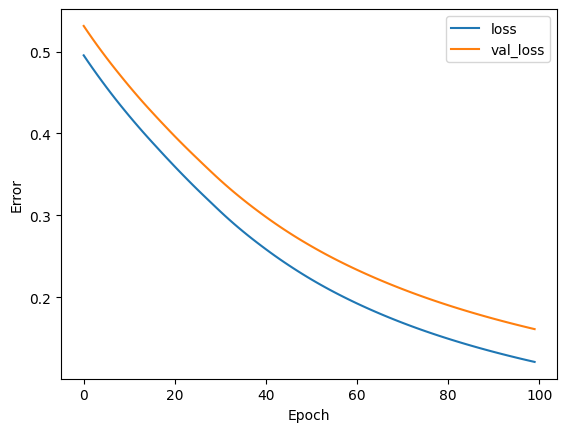

In [10]:
plt.plot(history_base.history['loss'], label='loss')
plt.plot(history_base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

### Metricas

In [11]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred_base = base.predict(X_test)
#y_pred_base_classes = np.argmax(y_pred_base, axis=1)
#y_pred_base_classes
y_pred_base

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.17096336],
       [0.8907148 ],
       [0.01552152],
       [0.18142268],
       [0.11062405],
       [0.8672372 ],
       [0.30797768],
       [0.06999401],
       [0.05274061],
       [0.17013264],
       [0.11356327],
       [0.8538344 ],
       [0.8864038 ],
       [0.86371374],
       [0.9426019 ],
       [0.18657444],
       [0.06911285],
       [0.1209423 ],
       [0.1974711 ],
       [0.06277495],
       [0.9032712 ],
       [0.14195758],
       [0.90349746],
       [0.06715251],
       [0.04888346],
       [0.06851307],
       [0.04891227],
       [0.06131276],
       [0.8495372 ],
       [0.86961067]], dtype=float32)

In [13]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [14]:
print(y_test[0][0])
print(y_pred_base[0][0])

0.0
0.17096336


[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


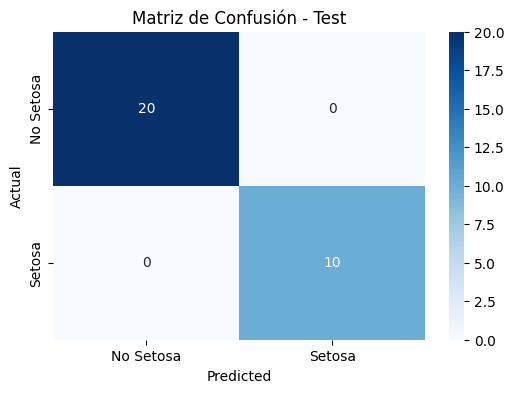

In [ ]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_base = to_binary_predictions(y_pred_base)

print(y_pred_base)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_base)
precision = precision_score(y_test, y_pred_base)
recall = recall_score(y_test, y_pred_base)
f1 = f1_score(y_test, y_pred_base)
f2 = fbeta_score(y_test, y_pred_base, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_base)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
--- MÉTRICAS DEL MODELO (Validación) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


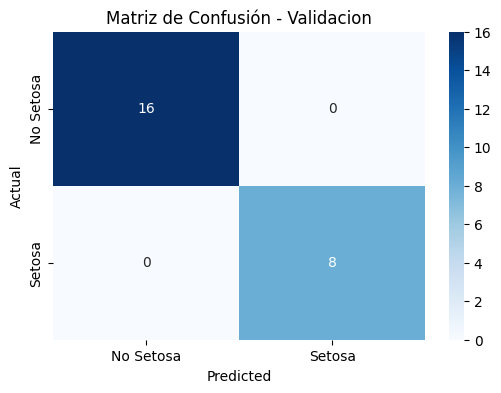

In [16]:



# Evaluación en conjunto de validación
y_pred_base_validation = base.predict(X_valid)
y_pred_base_validation = to_binary_predictions(y_pred_base_validation)


accuracy = accuracy_score(y_valid, y_pred_base_validation)
precision = precision_score(y_valid, y_pred_base_validation)
recall = recall_score(y_valid, y_pred_base_validation)
f1 = f1_score(y_valid, y_pred_base_validation)
f2 = fbeta_score(y_valid, y_pred_base_validation, beta=2)
roc_auc = roc_auc_score(y_valid, y_pred_base_validation)

print("--- MÉTRICAS DEL MODELO (Validación) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


# Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred_base_validation)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels =  ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Validacion')
plt.show()



### Nuevos modelos 

**modelo 3 capas y (10,15,20) neuronas**

In [17]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m1 = tf.keras.Sequential()
m1.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m1.add(tf.keras.layers.Dense(10, activation="relu"))
m1.add(tf.keras.layers.Dense(15, activation="relu"))
m1.add(tf.keras.layers.Dense(20, activation="relu"))
m1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556 (2.17 KB)

 Trainable params: 556 (2.17 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
m1.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history_m1 = m1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.6432 - loss: 0.6794 - val_accuracy: 0.5833 - val_loss: 0.6924
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6862 - loss: 0.6753 - val_accuracy: 0.6250 - val_loss: 0.6880
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7305 - loss: 0.6712 - val_accuracy: 0.6250 - val_loss: 0.6836
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7305 - loss: 0.6671 - val_accuracy: 0.6250 - val_loss: 0.6793
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7904 - loss: 0.6630 - val_accuracy: 0.6250 - val_loss: 0.6749
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8294 - loss: 0.6588 - val_accuracy: 0.6667 - val_loss: 0.6705
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8464 - loss: 0.6546 - val_accuracy: 0.6667 - val_loss: 0.6661
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8776 - loss: 0.6504 - val_accuracy: 0.7083 - val_loss

In [21]:
y_pred_m1 = m1.predict(X_test)
y_pred_m1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[0.20480925],
       [0.7883376 ],
       [0.11085296],
       [0.20446539],
       [0.19045894],
       [0.8235628 ],
       [0.26569694],
       [0.17983507],
       [0.14046216],
       [0.19043809],
       [0.18266864],
       [0.8715092 ],
       [0.8394431 ],
       [0.8668235 ],
       [0.8848854 ],
       [0.20745136],
       [0.16584423],
       [0.16055027],
       [0.18424577],
       [0.15826836],
       [0.8821519 ],
       [0.19291063],
       [0.8651203 ],
       [0.15947971],
       [0.13185237],
       [0.1837072 ],
       [0.15045193],
       [0.1501208 ],
       [0.8588897 ],
       [0.8643228 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


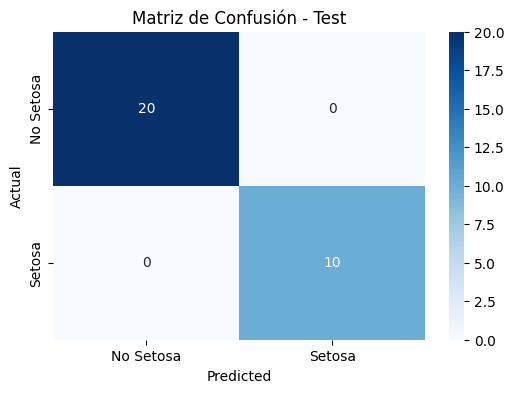

In [ ]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_m1 = to_binary_predictions(y_pred_m1)

print(y_pred_m1)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m1)
precision = precision_score(y_test, y_pred_m1)
recall = recall_score(y_test, y_pred_m1)
f1 = f1_score(y_test, y_pred_m1)
f2 = fbeta_score(y_test, y_pred_m1, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m1)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 5 capas y (5,7,21,30,5) neuronas**

In [23]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m2 = tf.keras.Sequential()
m2.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(7, activation="relu"))
m2.add(tf.keras.layers.Dense(21, activation="relu"))
m2.add(tf.keras.layers.Dense(30, activation="relu"))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [24]:
m2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056 (4.12 KB)

 Trainable params: 1,056 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
m2.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history_m2 = m2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6810 - loss: 0.7011 - val_accuracy: 0.6667 - val_loss: 0.7002
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6810 - loss: 0.6966 - val_accuracy: 0.6667 - val_loss: 0.6950
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6810 - loss: 0.6926 - val_accuracy: 0.6667 - val_loss: 0.6901
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6810 - loss: 0.6887 - val_accuracy: 0.6667 - val_loss: 0.6853
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6810 - loss: 0.6849 - val_accuracy: 0.6667 - val_loss: 0.6806
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6810 - loss: 0.6813 - val_accuracy: 0.7083 - val_loss: 0.6760
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6810 - loss: 0.6777 - val_accuracy: 0.7083 - val_loss: 0.6715
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7161 - loss: 0.6742 - val_accuracy: 0.8333 - val_loss

In [27]:
y_pred_m2 = m2.predict(X_test)
y_pred_m2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[0.22391139],
       [0.7178236 ],
       [0.23240708],
       [0.22391139],
       [0.22384548],
       [0.8206356 ],
       [0.27555305],
       [0.22372589],
       [0.2232888 ],
       [0.24398145],
       [0.22382773],
       [0.94524384],
       [0.8443164 ],
       [0.9346379 ],
       [0.8725307 ],
       [0.22516501],
       [0.2238614 ],
       [0.31306234],
       [0.2298185 ],
       [0.22382836],
       [0.939165  ],
       [0.22391139],
       [0.88730973],
       [0.22383425],
       [0.22760196],
       [0.22326143],
       [0.22327541],
       [0.22378613],
       [0.9339275 ],
       [0.9334517 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


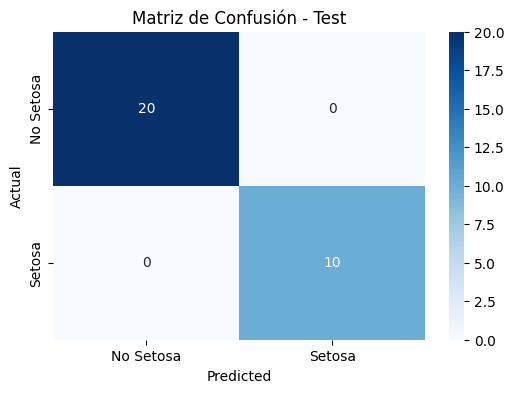

In [28]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_m2 = to_binary_predictions(y_pred_m2)

print(y_pred_m2)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m2)
precision = precision_score(y_test, y_pred_m2)
recall = recall_score(y_test, y_pred_m2)
f1 = f1_score(y_test, y_pred_m2)
f2 = fbeta_score(y_test, y_pred_m2, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m2)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 4 capas y (8,20,35,46) neuronas**

In [29]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m3 = tf.keras.Sequential()
m3.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m3.add(tf.keras.layers.Dense(8, activation="relu"))
m3.add(tf.keras.layers.Dense(20, activation="relu"))
m3.add(tf.keras.layers.Dense(35, activation="relu"))
m3.add(tf.keras.layers.Dense(46, activation="relu"))
m3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [30]:
m3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │           735 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         1,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            47 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658 (10.38 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
m3.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history_m3 = m3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.3477 - loss: 0.6754 - val_accuracy: 0.4583 - val_loss: 0.6687
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5482 - loss: 0.6686 - val_accuracy: 0.6667 - val_loss: 0.6631
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8112 - loss: 0.6621 - val_accuracy: 0.8750 - val_loss: 0.6576
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9740 - loss: 0.6557 - val_accuracy: 0.8750 - val_loss: 0.6522
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.6495 - val_accuracy: 0.9167 - val_loss: 0.6469
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.6434 - val_accuracy: 0.9167 - val_loss: 0.6416
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.6373 - val_accuracy: 0.9583 - val_loss: 0.6365
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.6313 - val_accuracy: 1.0000 - val_loss

In [33]:
y_pred_m3 = m3.predict(X_test)
y_pred_m3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.23435059],
       [0.9598396 ],
       [0.19142763],
       [0.23494466],
       [0.23008761],
       [0.90201986],
       [0.25112307],
       [0.2131246 ],
       [0.22853129],
       [0.24597615],
       [0.22014184],
       [0.9005735 ],
       [0.9404068 ],
       [0.9183535 ],
       [0.9791537 ],
       [0.2331559 ],
       [0.2051666 ],
       [0.24200945],
       [0.23415397],
       [0.20548335],
       [0.9362426 ],
       [0.222547  ],
       [0.93357635],
       [0.20709342],
       [0.2465773 ],
       [0.2118673 ],
       [0.20942532],
       [0.20567667],
       [0.85900795],
       [0.9091917 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


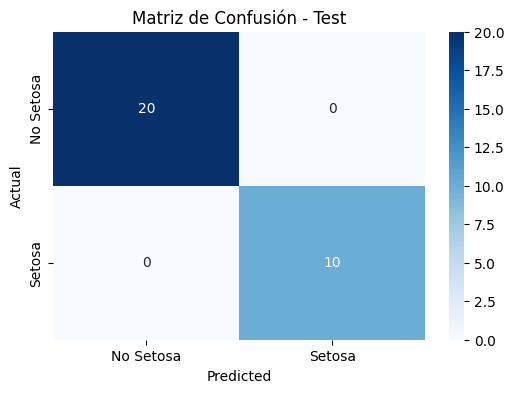

In [34]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_m3 = to_binary_predictions(y_pred_m3)

print(y_pred_m3)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m3)
precision = precision_score(y_test, y_pred_m3)
recall = recall_score(y_test, y_pred_m3)
f1 = f1_score(y_test, y_pred_m3)
f2 = fbeta_score(y_test, y_pred_m3, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m3)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m3)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

## Punto 2: Clasificacion con redes neuronales - Datos heart

### Modelo Base

In [135]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [136]:
df = pd.read_csv('heart.csv')

In [137]:
df.shape

(303, 14)

In [138]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Seleccion de variables:**
Se seleccionan el siguinete subconjunto de variables: 

categoricas numericas: 'sex', 'exang', 'fbs'

categorica string: 'thal'

numerica: 'age', 'trestbps', 'chol'

In [139]:
df.drop(columns=['cp', 'restecg','ca','thalach', 'oldpeak', 'slope'])

,age,sex,trestbps,chol,fbs,exang,thal,target
0,63,1,145,233,1,0,fixed,0
1,67,1,160,286,0,1,normal,1
2,67,1,120,229,0,1,reversible,0
3,37,1,130,250,0,0,normal,0
4,41,0,130,204,0,0,normal,0
...,...,...,...,...,...,...,...,...
298,52,1,118,186,0,0,fixed,0
299,43,0,132,341,1,1,reversible,1
300,65,1,135,254,0,0,reversible,1
301,48,1,130,256,1,1,reversible,1


In [140]:
cat_int_feats = ['sex', 'fbs', 'exang']
cat_str_feats = ['thal']
num_feats = ['age', 'trestbps', 'chol']

In [141]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

In [142]:
df = df[feats_ordered+['target']]

In [143]:
df.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
0,1,1,0,fixed,63,145,233,0
1,1,0,1,normal,67,160,286,1
2,1,0,1,reversible,67,120,229,0
3,1,0,0,normal,37,130,250,0
4,0,0,0,normal,41,130,204,0


Separacion de conjuntos: 

In [144]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
69,0,0,0,normal,35,138,183,0
300,1,0,0,reversible,65,135,254,1
220,1,0,0,normal,59,134,204,0
134,1,1,0,reversible,42,120,240,0
7,0,0,1,normal,57,120,354,0


In [145]:
train.shape

(242, 8)

In [146]:
test = df.drop(train.index)
test.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
0,1,1,0,fixed,63,145,233,0
2,1,0,1,reversible,67,120,229,0
4,0,0,0,normal,41,130,204,0
8,1,0,0,reversible,63,130,254,1
13,1,0,0,reversible,44,120,263,0


In [147]:
test.shape

(61, 8)

In [148]:
val = train.sample(frac=0.2, random_state=100)

In [149]:
val.shape

(48, 8)

In [150]:
train = train.drop(val.index)

In [151]:
print(train.shape)
print(val.shape)
print(test.shape)

(194, 8)
(48, 8)
(61, 8)


Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [152]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [153]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [154]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [155]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=62>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=124>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=209>}
Target: tf.Tensor(0, shape=(), dtype=int64)


In [156]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [157]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

In [158]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

In [159]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [160]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [161]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [162]:
for i in inputs:
   print(i)

<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>
<KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=thal>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=trestbps>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=chol>


In [163]:
feats_encoded=[]

In [164]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [165]:
len_feats = len(feats_encoded)
len_feats

3

In [166]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [167]:
len_feats = len(feats_encoded)
len_feats

4

In [168]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [169]:
for i in feats_encoded:
  print(i)

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_42>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_43>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_44>
<KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_45>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_46>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_47>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_48>


Creamos una capa concatenando todas las variables codificadas

In [170]:
all_feats = keras.layers.concatenate(feats_encoded)

In [171]:
type(all_feats)

keras.src.backend.common.keras_tensor.KerasTensor

Agregamos una capa densa con 32 neuronas y función de activación relu

In [172]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

Creamos una capa concatenando todas las variables codificadas

In [173]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [174]:
model = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [175]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Aseguramos que Keras use TensorFlow como backend, para asegurar que el modelo pueda usar strings como entradas

In [177]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

### Entrenamineto

In [178]:
hostory = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2509 - loss: 0.8606 - val_accuracy: 0.2500 - val_loss: 0.7943
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3593 - loss: 0.7719 - val_accuracy: 0.3542 - val_loss: 0.7379
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4244 - loss: 0.7350 - val_accuracy: 0.5208 - val_loss: 0.6920
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5261 - loss: 0.6894 - val_accuracy: 0.6667 - val_loss: 0.6536
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6285 - loss: 0.6540 - val_accuracy: 0.7292 - val_loss: 0.6228
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.6078 - val_accuracy: 0.7917 - val_loss: 0.5991
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6903 - loss: 0.6016 - val_accuracy: 0.8125 - val_loss: 0.5816
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7561 - loss: 0.5757 - val_accuracy: 0.7917 - val_loss: 0.5674

In [179]:
print(test_ds)
y_pred_modelo= model.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo


<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
61


array([[0.47636166],
       [0.09219855],
       [0.21020605],
       [0.0191479 ],
       [0.08344197],
       [0.14762916],
       [0.76383334],
       [0.6992535 ],
       [0.35185522],
       [0.34589174],
       [0.04075231],
       [0.66752553],
       [0.7324394 ],
       [0.10711086],
       [0.31018758],
       [0.6683148 ],
       [0.33820105],
       [0.06819074],
       [0.04955274],
       [0.7129952 ],
       [0.2524055 ],
       [0.408158  ],
       [0.04495494],
       [0.4086819 ],
       [0.64409745],
       [0.02239303],
       [0.13947004],
       [0.01250634],
       [0.04058082],
       [0.08689525],
       [0.30389345],
       [0.7783051 ],
       [0.05643646],
       [0.688049  ],
       [0.38882625],
       [0.12069377],
       [0.5370177 ],
       [0.13265944],
       [0.24971156],
       [0.09800129],
       [0.20449679],
       [0.3190202 ],
       [0.61423725],
       [0.00855168],
       [0.5667554 ],
       [0.4097301 ],
       [0.05725788],
       [0.046

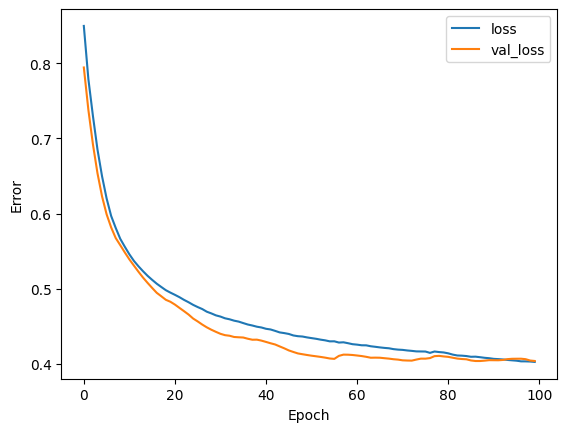

In [180]:
plt.plot(hostory.history['loss'], label='loss')
plt.plot(hostory.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

[0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 0.5410
Precision: 0.2667
Recall: 0.1905
F1 Score: 0.2222
F2 Score: 0.2020
ROC AUC Score: 0.4577


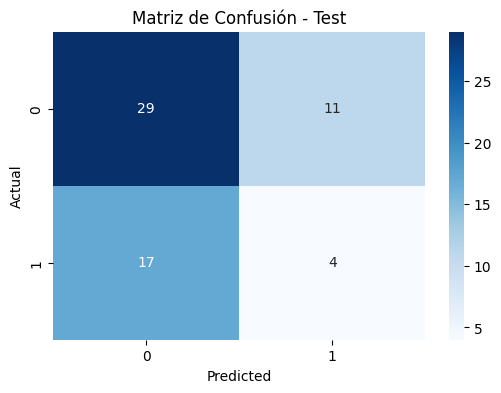

In [ ]:
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modificar optimizador

Con:SDG

In [182]:
feats_encoded

[<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_42>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_43>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_44>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_45>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_46>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_47>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_48>]

In [192]:
all_feats_opti_1 = keras.layers.concatenate(feats_encoded)
model_layers_opti_1 = keras.layers.Dense(32, activation='relu')(all_feats_opti_1)
model_layers_opti_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_opti_1)
model_opti_1 = keras.Model(inputs, model_layers_opti_1)

model_opti_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7406 - loss: 0.5227 - val_accuracy: 0.7708 - val_loss: 0.4853
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7542 - loss: 0.4879 - val_accuracy: 0.7708 - val_loss: 0.4845
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7728 - loss: 0.4785 - val_accuracy: 0.7708 - val_loss: 0.4828
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7484 - loss: 0.5086 - val_accuracy: 0.7708 - val_loss: 0.4819
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7794 - loss: 0.4698 - val_accuracy: 0.7708 - val_loss: 0.4801
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7359 - loss: 0.5006 - val_accuracy: 0.7708 - val_loss: 0.4784
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7351 - loss: 0.5094 - val_accuracy: 0.7708 - val_loss: 0.4766
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7837 - loss: 0.4703 - val_accuracy: 0.7708 - val_loss: 0.4763
Epoch 9

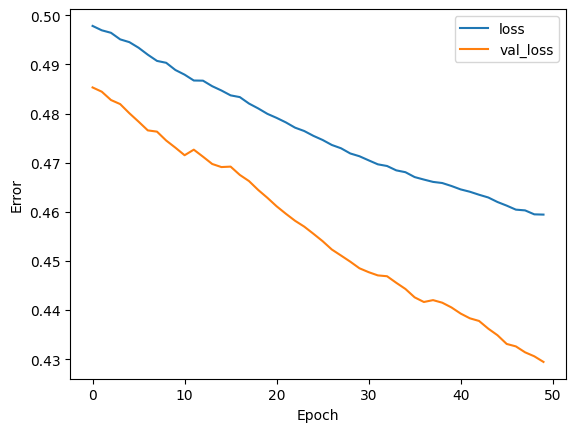

In [195]:
history_model_opti_1 = model_opti_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_opti_1.history['loss'], label='loss')
plt.plot(history_model_opti_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
61
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0]
61
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

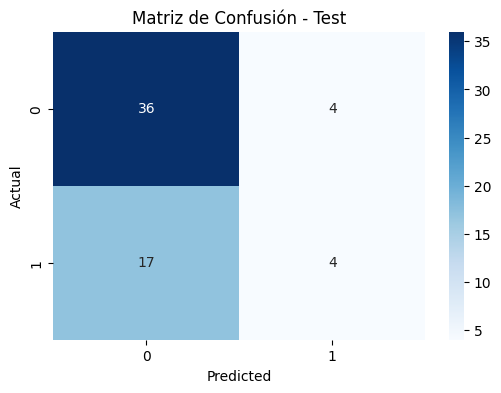

In [196]:
print(test_ds)
y_pred_modelo= model_opti_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

con: adamw

In [198]:
all_feats_opti_2 = keras.layers.concatenate(feats_encoded)
model_layers_opti_2 = keras.layers.Dense(32, activation='relu')(all_feats_opti_2)
model_layers_opti_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_opti_2)
model_opti_2 = keras.Model(inputs, model_layers_opti_2)

model_opti_2.compile(optimizer='adamw', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4491 - loss: 0.7329 - val_accuracy: 0.6042 - val_loss: 0.6743
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4704 - loss: 0.7127 - val_accuracy: 0.6458 - val_loss: 0.6441
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5890 - loss: 0.6669 - val_accuracy: 0.6667 - val_loss: 0.6185
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7072 - loss: 0.6403 - val_accuracy: 0.7500 - val_loss: 0.5952
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7173 - loss: 0.6323 - val_accuracy: 0.7917 - val_loss: 0.5752
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7331 - loss: 0.6165 - val_accuracy: 0.8125 - val_loss: 0.5586
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7894 - loss: 0.5725 - val_accuracy: 0.7917 - val_loss: 0.5433
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7523 - loss: 0.5834 - val_accuracy: 0.7917 - val_loss: 0.5309
Epoch 

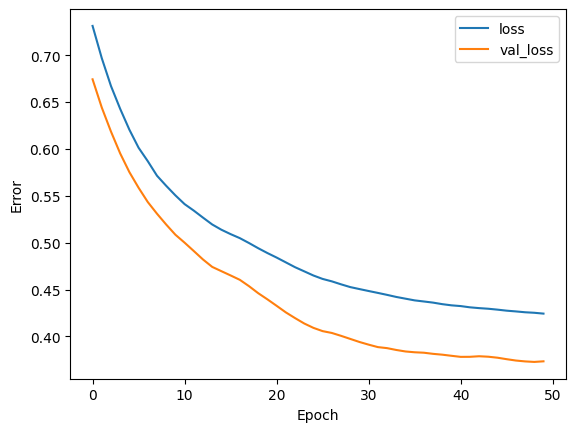

In [199]:
history_model_opti_2 = model_opti_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_opti_2.history['loss'], label='loss')
plt.plot(history_model_opti_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
61
[1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1]
61
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
-

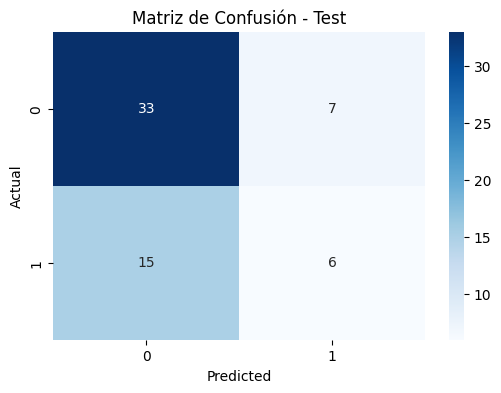

In [200]:
print(test_ds)
y_pred_modelo= model_opti_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modificar tasa de aprendizaje

tasa: 0.0005 

In [202]:
all_feats_tasa_1 = keras.layers.concatenate(feats_encoded)
model_layers_tasa_1 = keras.layers.Dense(32, activation='relu')(all_feats_tasa_1)
model_layers_tasa_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_tasa_1)
model_tasa_1 = keras.Model(inputs, model_layers_tasa_1)

model_tasa_1.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7223 - loss: 0.6283 - val_accuracy: 0.7292 - val_loss: 0.5961
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7540 - loss: 0.6185 - val_accuracy: 0.7500 - val_loss: 0.5871
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.6086 - val_accuracy: 0.7292 - val_loss: 0.5777
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7653 - loss: 0.5934 - val_accuracy: 0.7292 - val_loss: 0.5693
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7637 - loss: 0.5970 - val_accuracy: 0.7292 - val_loss: 0.5607
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7422 - loss: 0.5999 - val_accuracy: 0.7500 - val_loss: 0.5527
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6853 - loss: 0.6108 - val_accuracy: 0.7500 - val_loss: 0.5455
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7595 - loss: 0.5778 - val_accuracy: 0.7500 - val_loss: 0.5388
Epoch 9

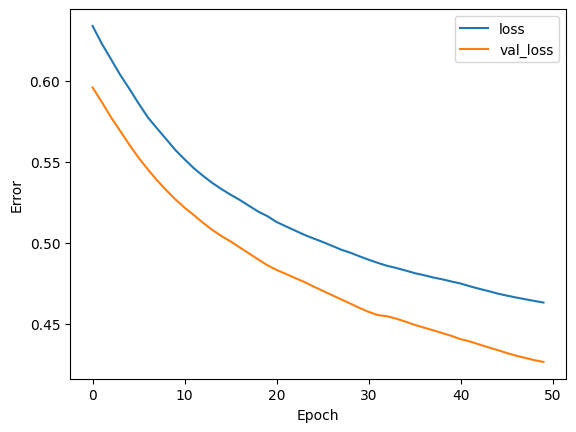

In [203]:
history_model_tasa_1 = model_tasa_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_tasa_1.history['loss'], label='loss')
plt.plot(history_model_tasa_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
61
[1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

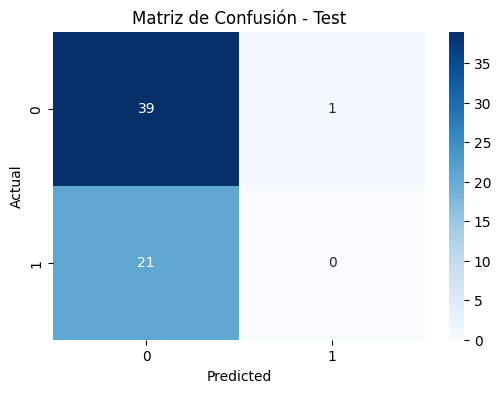

In [204]:
print(test_ds)
y_pred_modelo= model_tasa_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

tasa:0.0001 

In [205]:
all_feats_tasa_2 = keras.layers.concatenate(feats_encoded)
model_layers_tasa_2 = keras.layers.Dense(32, activation='relu')(all_feats_tasa_2)
model_layers_tasa_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_tasa_2)
model_tasa_2 = keras.Model(inputs, model_layers_tasa_2)

model_tasa_2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.2131 - loss: 0.8428 - val_accuracy: 0.2083 - val_loss: 0.8589
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2107 - loss: 0.8414 - val_accuracy: 0.2292 - val_loss: 0.8526
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2448 - loss: 0.8281 - val_accuracy: 0.2292 - val_loss: 0.8468
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2354 - loss: 0.8265 - val_accuracy: 0.2292 - val_loss: 0.8409
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2507 - loss: 0.8101 - val_accuracy: 0.2292 - val_loss: 0.8350
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2570 - loss: 0.8207 - val_accuracy: 0.2292 - val_loss: 0.8297
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2578 - loss: 0.8111 - val_accuracy: 0.2292 - val_loss: 0.8246
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2590 - loss: 0.8008 - val_accuracy: 0.2292 - val_loss: 0.8197
Epoch 9

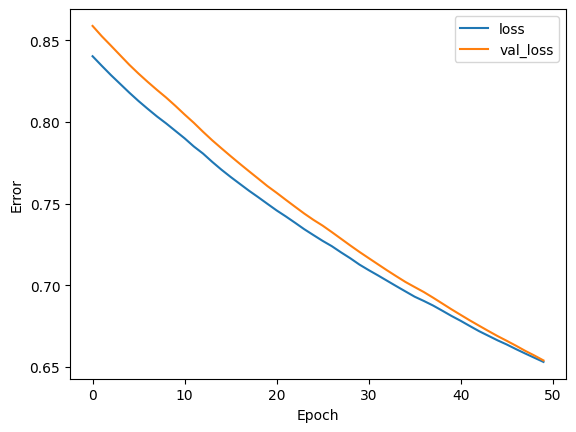

In [206]:
history_model_tasa_2 = model_tasa_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_tasa_2.history['loss'], label='loss')
plt.plot(history_model_tasa_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
61
[1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


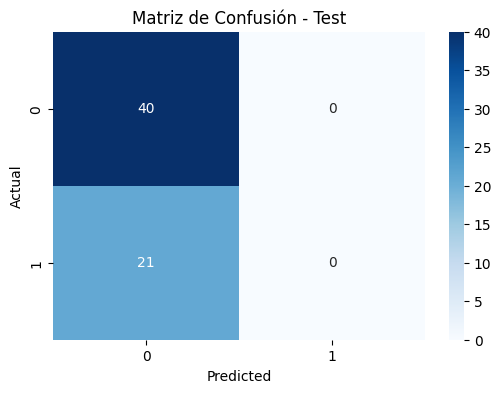

In [207]:
print(test_ds)
y_pred_modelo= model_tasa_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

tasa: 0.007

In [ ]:
all_feats_tasa_3 = keras.layers.concatenate(feats_encoded)
model_layers_tasa_3 = keras.layers.Dense(32, activation='relu')(all_feats_tasa_3)
model_layers_tasa_3 = keras.layers.Dense(1, activation='sigmoid')(model_layers_tasa_3)
model_tasa_3 = keras.Model(inputs, model_layers_tasa_3)

model_tasa_3.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4079 - loss: 0.7391 - val_accuracy: 0.7708 - val_loss: 0.5494
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7318 - loss: 0.5653 - val_accuracy: 0.7500 - val_loss: 0.4872
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7596 - loss: 0.4928 - val_accuracy: 0.7500 - val_loss: 0.4561
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7495 - loss: 0.4918 - val_accuracy: 0.7500 - val_loss: 0.4351
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.4516 - val_accuracy: 0.8333 - val_loss: 0.4281
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7665 - loss: 0.4693 - val_accuracy: 0.8125 - val_loss: 0.4219
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: 0.4420 - val_accuracy: 0.8125 - val_loss: 0.4098
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7869 - loss: 0.4338 - val_accuracy: 0.8125 - val_loss: 0.4006
Epoch 9

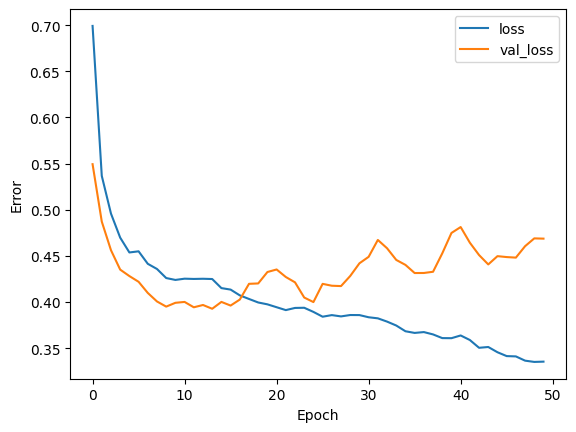

In [213]:
history_model_tasa_3 = model_tasa_3.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_tasa_3.history['loss'], label='loss')
plt.plot(history_model_tasa_3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step
61
[1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

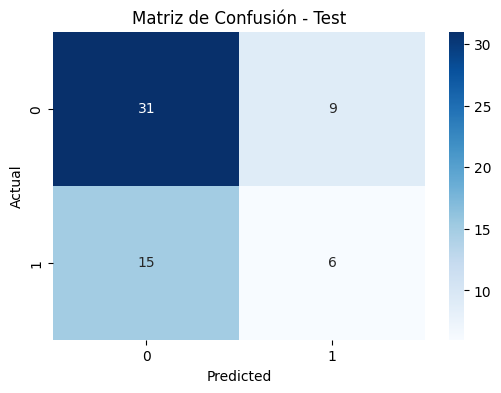

In [214]:
print(test_ds)
y_pred_modelo= model_tasa_3.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modificar funciones de activacion

celu 

In [217]:
all_feats_fun_1 = keras.layers.concatenate(feats_encoded)
model_layers_fun_1 = keras.layers.Dense(32, activation='celu')(all_feats_fun_1)
model_layers_fun_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fun_1)
model_fun_1 = keras.Model(inputs, model_layers_fun_1)

model_fun_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6806 - loss: 0.6445 - val_accuracy: 0.7292 - val_loss: 0.5738
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7509 - loss: 0.5781 - val_accuracy: 0.7708 - val_loss: 0.5336
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7585 - loss: 0.5678 - val_accuracy: 0.7708 - val_loss: 0.5067
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7650 - loss: 0.5316 - val_accuracy: 0.7708 - val_loss: 0.4893
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7596 - loss: 0.5140 - val_accuracy: 0.7500 - val_loss: 0.4745
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8095 - loss: 0.4808 - val_accuracy: 0.7917 - val_loss: 0.4625
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7545 - loss: 0.5006 - val_accuracy: 0.7917 - val_loss: 0.4537
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8195 - loss: 0.4454 - val_accuracy: 0.7917 - val_loss: 0.4465
Epoch 9

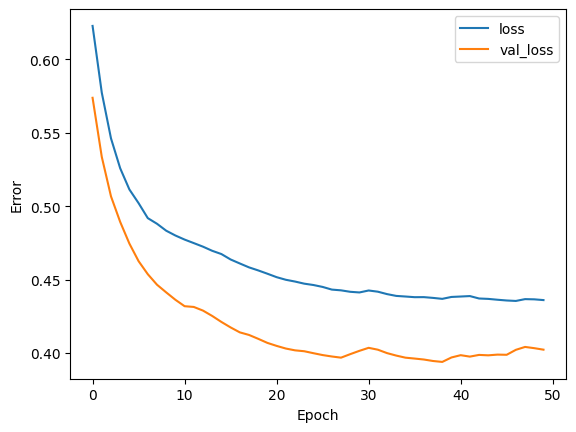

In [218]:
history_model_fun_1 = model_fun_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fun_1.history['loss'], label='loss')
plt.plot(history_model_fun_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
61
[1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0]
61
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
-

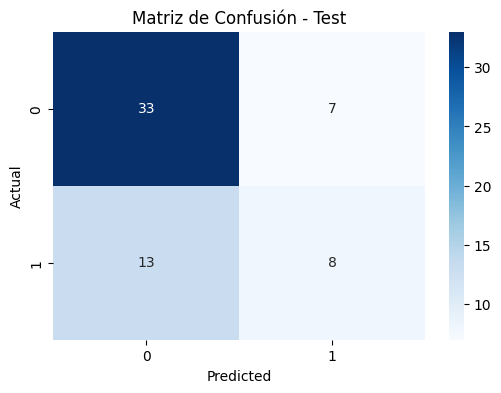

In [219]:
print(test_ds)
y_pred_modelo= model_fun_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

exponential 

In [220]:
all_feats_fun_2 = keras.layers.concatenate(feats_encoded)
model_layers_fun_2 = keras.layers.Dense(32, activation='exponential')(all_feats_fun_2)
model_layers_fun_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fun_2)
model_fun_2 = keras.Model(inputs, model_layers_fun_2)

model_fun_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.2876 - loss: 1.5406 - val_accuracy: 0.2500 - val_loss: 1.5009
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2900 - loss: 1.3668 - val_accuracy: 0.2500 - val_loss: 1.2311
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2595 - loss: 1.1068 - val_accuracy: 0.2292 - val_loss: 1.0249
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2835 - loss: 0.9269 - val_accuracy: 0.2917 - val_loss: 0.8676
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3486 - loss: 0.7993 - val_accuracy: 0.4583 - val_loss: 0.7612
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5567 - loss: 0.7230 - val_accuracy: 0.6042 - val_loss: 0.6930
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7058 - loss: 0.6563 - val_accuracy: 0.6667 - val_loss: 0.6539
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7282 - loss: 0.6050 - val_accuracy: 0.7083 - val_loss: 0.6245
Epoch 9

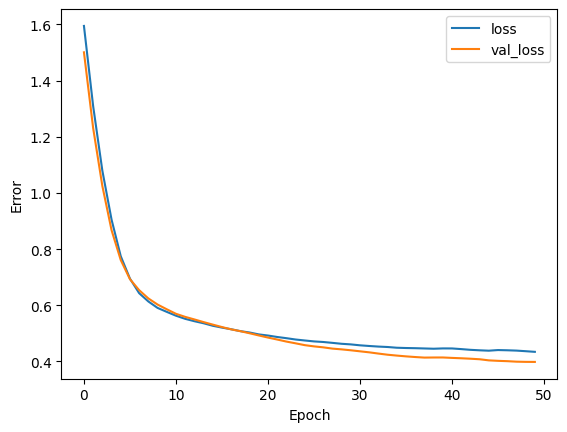

In [222]:
history_model_fun_2 = model_fun_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fun_2.history['loss'], label='loss')
plt.plot(history_model_fun_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
61
[0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0]
61
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

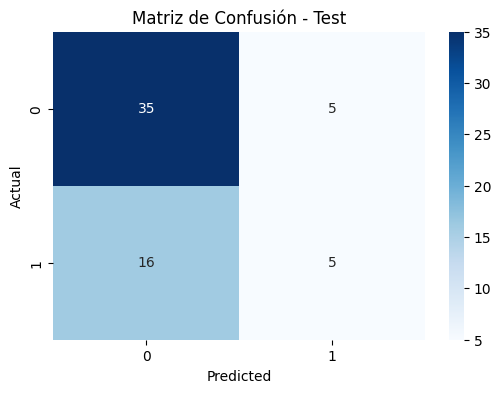

In [223]:
print(test_ds)
y_pred_modelo= model_fun_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

hard_tanh

In [225]:
all_feats_fun_3 = keras.layers.concatenate(feats_encoded)
model_layers_fun_3 = keras.layers.Dense(32, activation='hard_tanh')(all_feats_fun_3)
model_layers_fun_3 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fun_3)
model_fun_3 = keras.Model(inputs, model_layers_fun_3)

model_fun_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5902 - loss: 0.6797 - val_accuracy: 0.6875 - val_loss: 0.6308
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6885 - loss: 0.6123 - val_accuracy: 0.7708 - val_loss: 0.5789
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7075 - loss: 0.5712 - val_accuracy: 0.7708 - val_loss: 0.5403
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7496 - loss: 0.5518 - val_accuracy: 0.7083 - val_loss: 0.5135
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7808 - loss: 0.5232 - val_accuracy: 0.7292 - val_loss: 0.4946
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7701 - loss: 0.5092 - val_accuracy: 0.7500 - val_loss: 0.4819
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7444 - loss: 0.5248 - val_accuracy: 0.7708 - val_loss: 0.4715
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7452 - loss: 0.5237 - val_accuracy: 0.7708 - val_loss: 0.4635
Epo

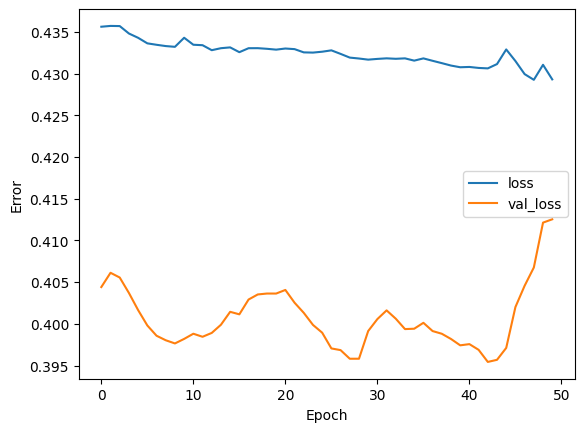

In [226]:
history_model_fun_3 = model_fun_3.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fun_1.history['loss'], label='loss')
plt.plot(history_model_fun_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
61
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0]
61
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
-

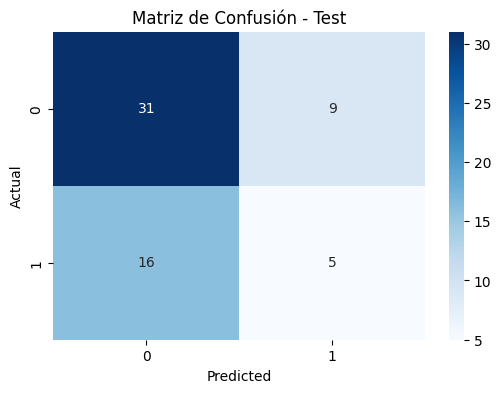

In [227]:
print(test_ds)
y_pred_modelo= model_fun_3.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modelos Finales

De acuerdo al F1 se elegien los siguienetes parametros: 

-optimizador:AdamW

-tasa de aprendizaje:0.007

-funcion de activacion: celu

In [228]:
all_feats_fin_1 = keras.layers.concatenate(feats_encoded)
model_layers_fin_1 = keras.layers.Dense(32, activation='celu')(all_feats_fin_1)
model_layers_fin_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fin_1)
model_fin_1 = keras.Model(inputs, model_layers_fun_1)

model_fin_1.compile(optimizer=keras.optimizers.AdamW(
    learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6770 - loss: 0.6414 - val_accuracy: 0.7083 - val_loss: 0.6065
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6840 - loss: 0.6294 - val_accuracy: 0.7708 - val_loss: 0.5668
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7264 - loss: 0.5942 - val_accuracy: 0.7708 - val_loss: 0.5361
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7829 - loss: 0.5330 - val_accuracy: 0.7500 - val_loss: 0.5134
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7684 - loss: 0.5194 - val_accuracy: 0.7500 - val_loss: 0.4991
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7274 - loss: 0.5351 - val_accuracy: 0.7500 - val_loss: 0.4882
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7529 - loss: 0.5163 - val_accuracy: 0.7500 - val_loss: 0.4767
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 0.5037 - val_accuracy: 0.7500 - val_loss: 0.4661
Epoc

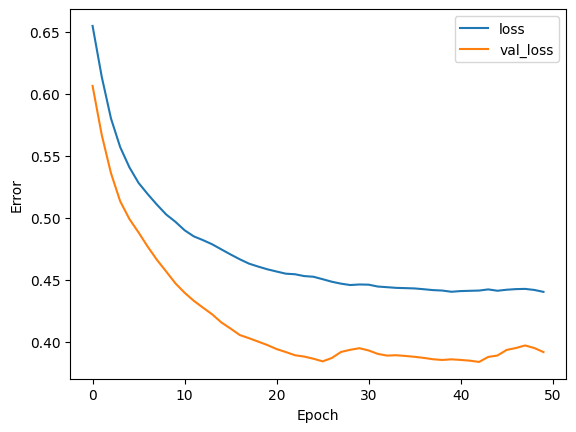

In [229]:
history_model_fin_1 = model_fun_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fin_1.history['loss'], label='loss')
plt.plot(history_model_fin_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
61
[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0]
61
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
-

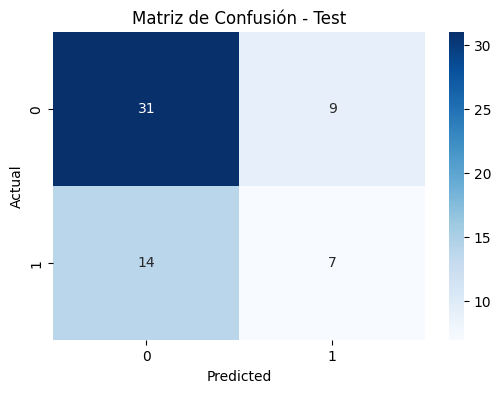

In [230]:
print(test_ds)
y_pred_modelo= model_fin_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

De acuerdo al F1 se elegien los siguienetes parametros: 

-optimizador: adam

-tasa de aprendizaje:0.01

-funcion de activacion: relu

In [231]:
all_feats_fin_2 = keras.layers.concatenate(feats_encoded)
model_layers_fin_2 = keras.layers.Dense(32, activation='celu')(all_feats_fin_2)
model_layers_fin_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fin_2)
model_fin_2 = keras.Model(inputs, model_layers_fin_2)

model_fin_2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.4294 - loss: 0.7709 - val_accuracy: 0.7500 - val_loss: 0.5049
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7740 - loss: 0.4936 - val_accuracy: 0.7708 - val_loss: 0.4285
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7612 - loss: 0.4755 - val_accuracy: 0.8125 - val_loss: 0.3955
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7508 - loss: 0.4196 - val_accuracy: 0.7917 - val_loss: 0.3856
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7714 - loss: 0.4555 - val_accuracy: 0.7917 - val_loss: 0.3826
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7828 - loss: 0.4311 - val_accuracy: 0.7917 - val_loss: 0.3751
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7692 - loss: 0.4368 - val_accuracy: 0.8125 - val_loss: 0.3727
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7747 - loss: 0.4580 - val_accuracy: 0.7917 - val_loss: 0.3801
Epoch 9

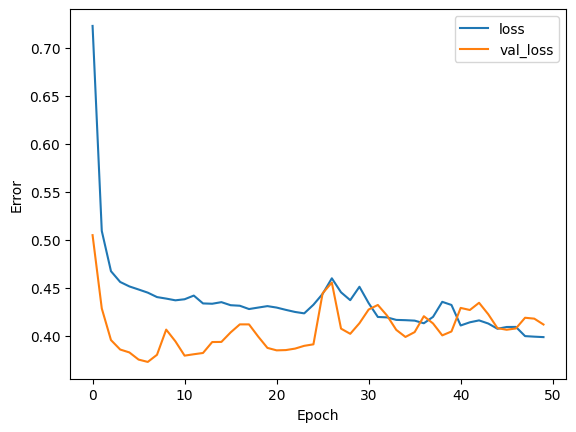

In [232]:
history_model_fin_2 = model_fin_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fin_2.history['loss'], label='loss')
plt.plot(history_model_fin_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
61
[1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0]
61
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
-

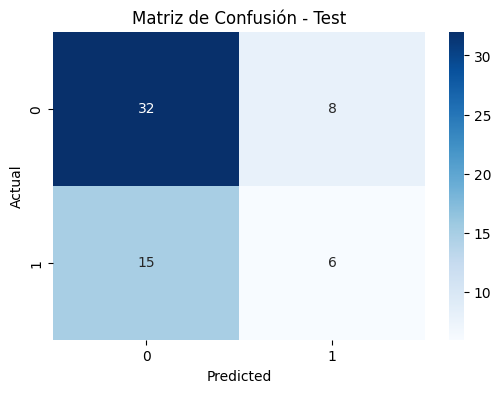

In [233]:
print(test_ds)
y_pred_modelo= model_fin_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()